<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







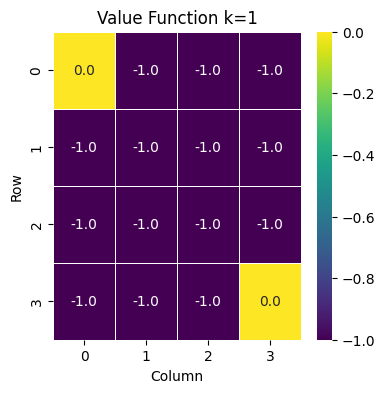

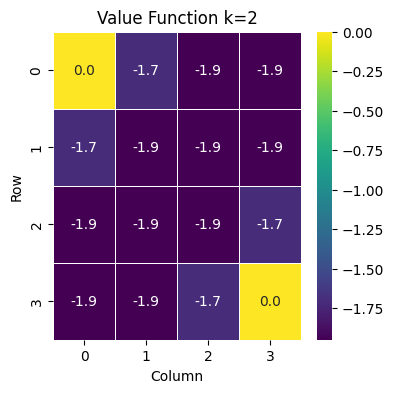

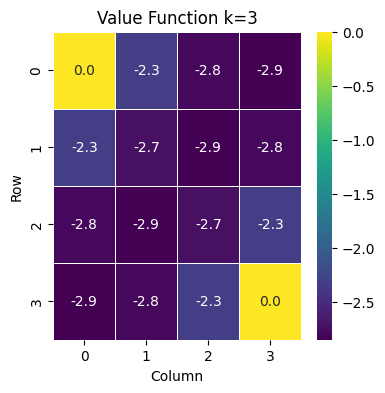

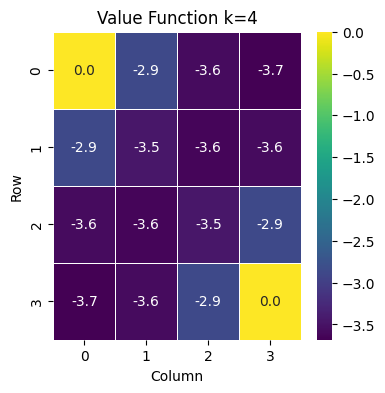

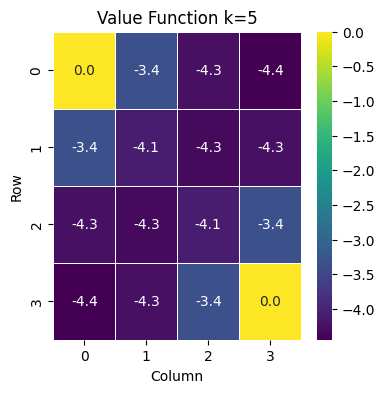

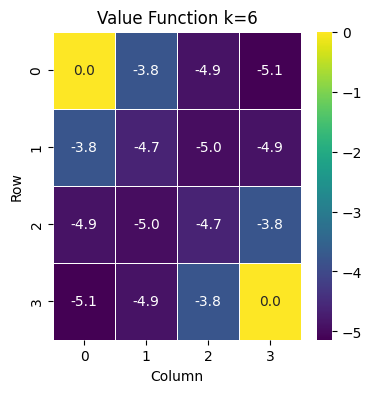

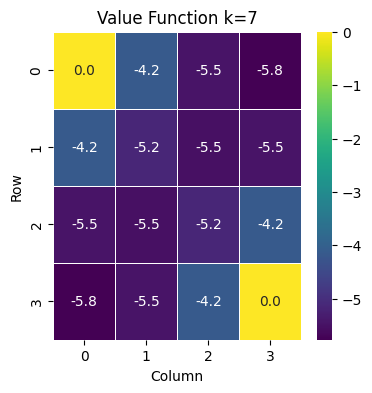

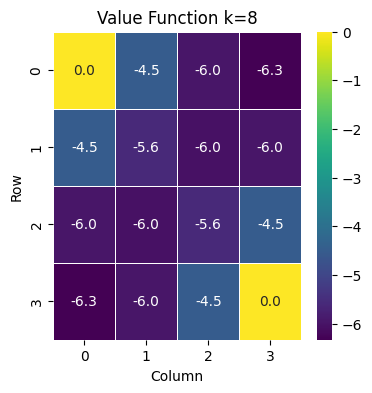

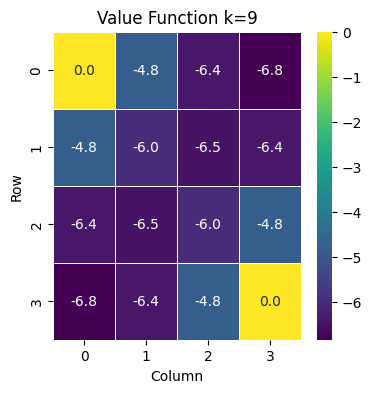

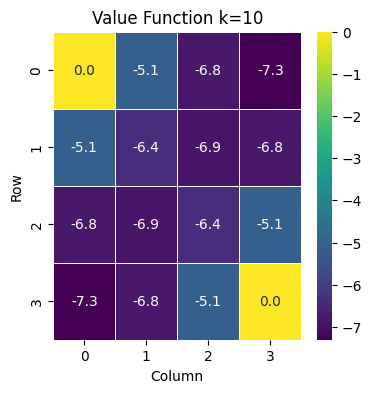

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

def pos_movement(s, V_old):

    V_possible = np.zeros(4)

    # Move Left
    if s % 4 == 0:
        V_possible[0] = V_old[s]
    else:
        V_possible[0] = V_old[s-1]

    # Move Right
    if s % 4 == 3:
        V_possible[1] = V_old[s]
    else:
        V_possible[1] = V_old[s+1]

    # Move Up
    if s < 4:
        V_possible[2] = V_old[s]
    else:
        V_possible[2] = V_old[s-4]

    # Move Down
    if s > 11:
        V_possible[3] = V_old[s]
    else:
        V_possible[3] = V_old[s+4]

    return V_possible


for k in range(10):
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########
    V_possible = pos_movement(s, V_old);

    V[s] = 0.25 * ( -1 + gamma * V_possible[0]) + 0.25 * ( -1 + gamma * V_possible[1])  + 0.25 * ( -1 + gamma * V_possible[2]) + 0.25 * ( -1 + gamma * V_possible[3])

  V_old = V.copy()

  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




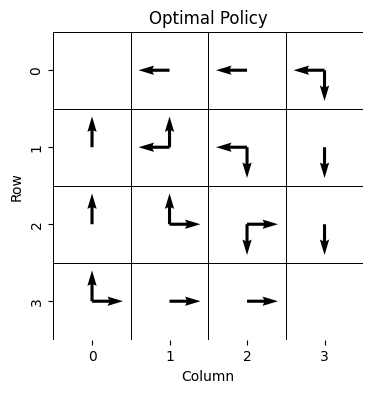

In [11]:
def look_around(s, V):

    Optimal_policy = []

    # Move Left
    if s % 4 == 0:
        left = -np.inf
    else:
        left = V[s-1]

    # Move Right
    if s % 4 == 3:
        right = -np.inf
    else:
        right = V[s+1]

    # Move Up
    if s < 4:
        up = -np.inf
    else:
        up = V[s-4]

    # Move Down
    if s > 11:
        down = -np.inf
    else:
        down = V[s+4]

    Optimal_policy = np.array([left, right, up, down], dtype=float)
    Optimal_policy = np.round(Optimal_policy, 5)
    best = Optimal_policy.max()
    return np.flatnonzero(Optimal_policy == best)

# Define arrows
DISP = {
    0: (-0.4,  0.0),  # Left
    1: ( 0.4,  0.0),  # Right
    2: ( 0.0,  -0.4), # Up
    3: ( 0.0,   0.4), # Down
}

# Function to plot the arrows
def plot_arrows(V):
    V_grid = V.reshape(4, 4)

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(np.zeros_like(V_grid), annot=False, linewidths=.5, cbar=False, cmap = "Grays", linecolor='black')

    for s in range(16):
        if s==0 or s==15:
          continue

        i, j = divmod(s, 4)
        x0, y0 = j + 0.5, i + 0.5

        dirs = look_around(s, V)

        for d in dirs:
            dx, dy = DISP[int(d)]
            ax.quiver(x0, y0, dx, dy,
                      angles='xy', scale_units='xy', scale=1,
                      width=0.01, color='k')

    plt.title("Optimal Policy")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

plot_arrows(V)



# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [12]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

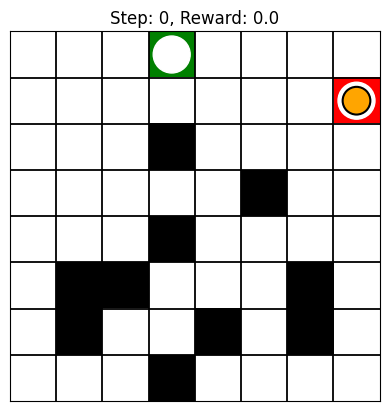

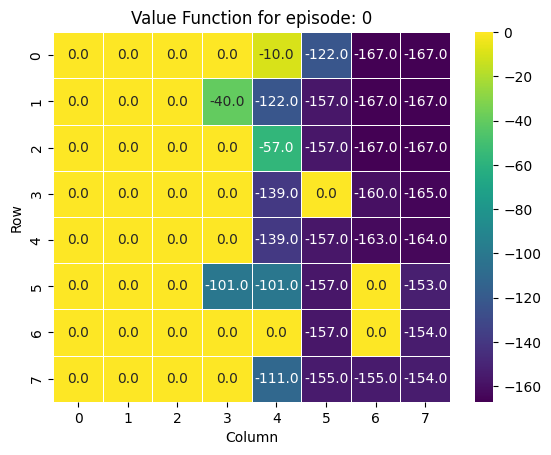

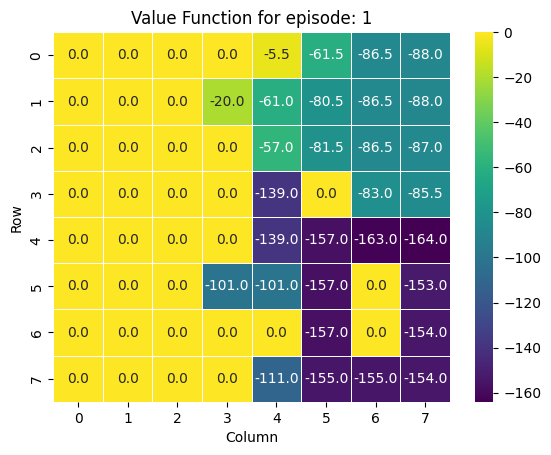

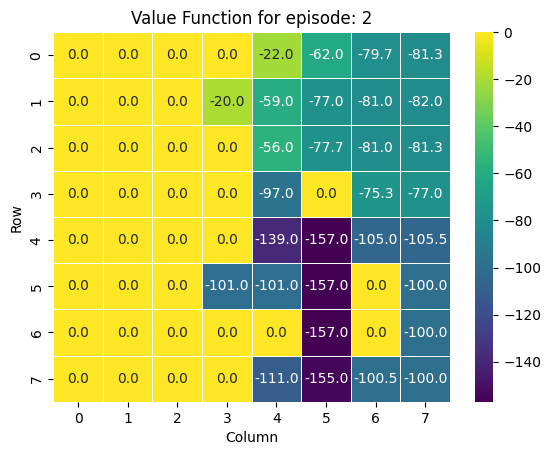

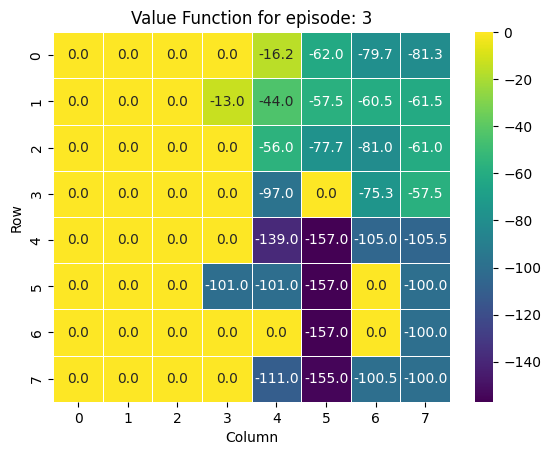

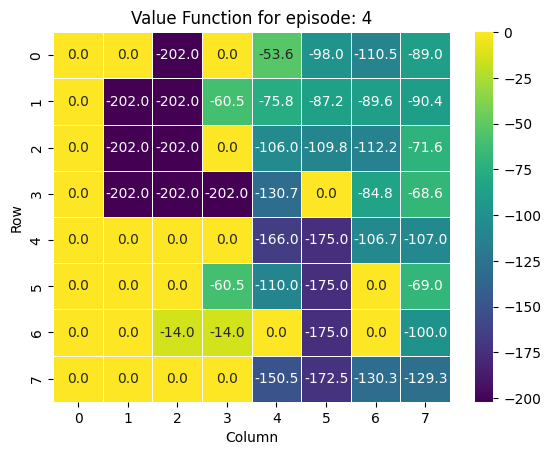

In [16]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(options=options)
done = env.unwrapped.done

num_episodes = 5
V = np.zeros(64)
gamma = 1
N = np.zeros(64)

for episode in range(num_episodes):

    # Reset environment
    obs_list = []
    reward_list = []
    obs, info = env.reset(options=options)
    done = False

    while not done:
        obs_list.append(obs)
        action = env.action_space.sample()   # Random action
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)

    T = len(obs_list)
    Gt = np.empty(T, float)
    G = 0.0

    for t in reversed(range(T)):
        G = gamma * G + reward_list[t]
        Gt[t] = G

    seen = set()
    for t, obs in enumerate(obs_list):
        if obs in seen:
            continue
        seen.add(obs)
        N[obs] += 1
        V[obs] += (Gt[t] - V[obs]) / N[obs]


    V_grid2 = V.reshape((8, 8))

    # Plot the value function as a heatmap
    sns.heatmap(V_grid2, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
    plt.title("Value Function for episode: %d" % episode)
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

# env.close()